Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić

Rok za predaju: **22. listopada 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija.

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [18]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['poly', 'e', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [19]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [20]:
from sklearn.preprocessing import PolynomialFeatures


phi = PolynomialFeatures(1).fit_transform(X)

print(phi)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [21]:
import numpy as np
from numpy import linalg

w = np.dot(np.dot(np.linalg.inv(np.dot(phi.T, phi)), phi.T), y)

w_pinv = np.dot(np.linalg.pinv(phi), y)

print("Težine w koristeći w=(Φ⊺Φ)−1Φ⊺y")
print(w)

print("\nTežine w koristeći w=Φ+y")
print(w_pinv)

Težine w koristeći w=(Φ⊺Φ)−1Φ⊺y
[2.2        0.45714286]

Težine w koristeći w=Φ+y
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

Pogreška učenja je 2.042857142857143


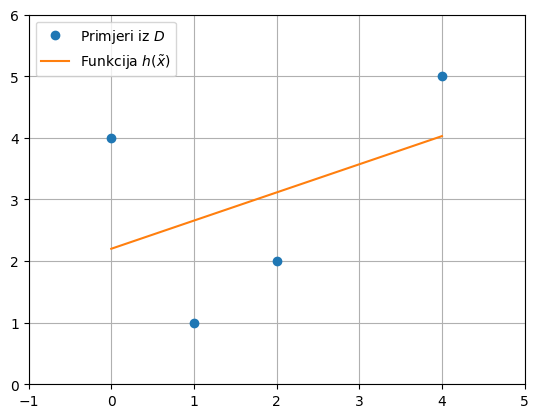

In [22]:
from sklearn.metrics import mean_squared_error

h = np.dot(phi, w)

e = mean_squared_error(y, h)
print("Pogreška učenja je " + str(e))

plt.plot(X, y, 'o', X, h)
plt.legend(['Primjeri iz $D$', 'Funkcija $h(\~{x}$)'])
plt.axis([-1, 5, 0, 6])
plt.grid()

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [23]:
try:
    np.linalg.inv(phi)
except:
    print("Ne možemo naći inverz od Φ")

Ne možemo naći inverz od Φ


### (e)

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(phi, y)

w = [model.intercept_, model.coef_[1]]
print("Težine: " + str(w))

predikcija = model.predict(phi)
e2 = mean_squared_error(y, predikcija)

print("\nPrethodno izračunata pogreška: " + str(e))
print("Novo izračunata pogreška: " + str(e2))

Težine: [2.2, 0.45714285714285713]

Prethodno izračunata pogreška: 2.042857142857143
Novo izračunata pogreška: 2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html).

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [25]:
from numpy.random import normal

def f(x):
    return (5 + x - 2 * (x**2) - 5 * (x**3))

def make_labels(X, f, noise=0):
    return f(X) + normal(0, noise, len(X))

In [26]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [27]:
N = 50
sigma = 200

X = np.concatenate(make_instances(-5, 5, N))
y = make_labels(X, f, sigma)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

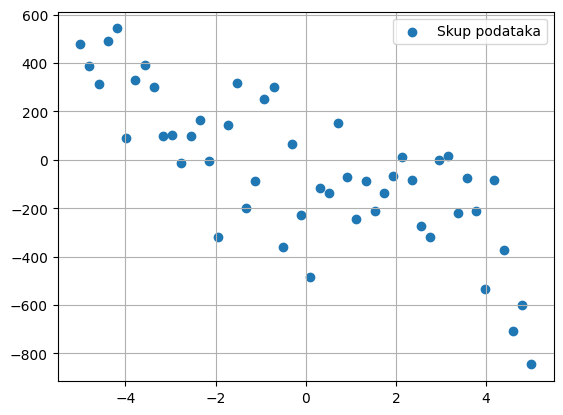

In [182]:
plt.scatter(X, y, label='Skup podataka')

plt.legend()
plt.grid()
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

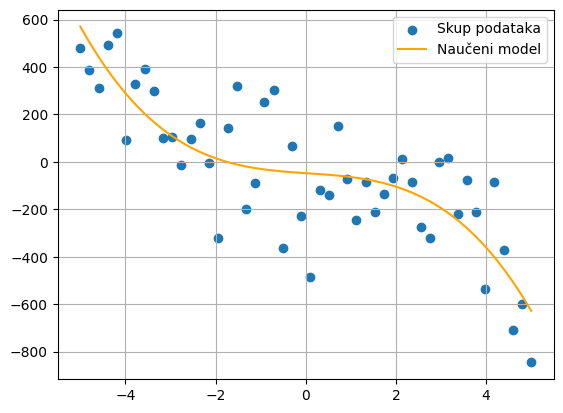

In [183]:
poly = PolynomialFeatures(3)
X2 = poly.fit_transform(X.reshape(-1,1))

model = LinearRegression()
model.fit(X2, y)

h2 = model.predict(X2)

plt.scatter(X, y, label='Skup podataka')
plt.plot(X, h2, label='Naučeni model', color='orange')

plt.legend()
plt.grid()
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Pogreška učenja za model d = 1 je 35157.79163201985
Pogreška učenja za model d = 3 je 24679.43697420151
Pogreška učenja za model d = 5 je 23523.08627289158
Pogreška učenja za model d = 10 je 21466.154569940878
Pogreška učenja za model d = 20 je 15619.160081831445


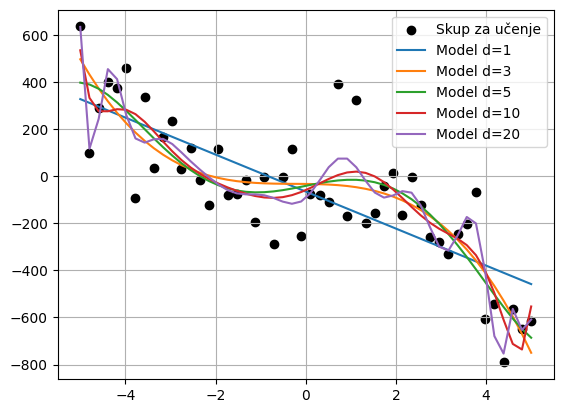

In [30]:
d = [1,3,5,10,20]

plt.scatter(X, y, label='Skup za učenje', color = 'black')

for i in d:
    poly = PolynomialFeatures(i)
    X3 = poly.fit_transform(X.reshape(-1,1))

    model3 = LinearRegression()
    model3.fit(X3, y)

    h3 = model3.predict(X3)

    plt.plot(X, h3, label=f'Model d={i}')

    e3 = mean_squared_error(y, h3)
    print("Pogreška učenja za model d = " + str(i) + " je " + str(e3))

plt.grid()
plt.legend()
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

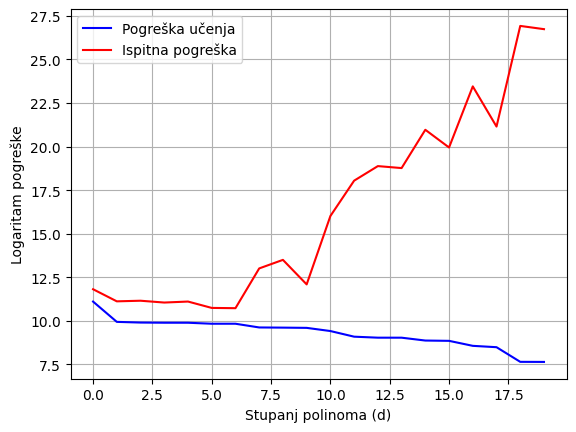

In [156]:
from sklearn.model_selection import train_test_split

train_errors = []
test_errors = []
d = range(0, 20)
X3b = X
y3b = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

for i in d:
    poly = PolynomialFeatures(i)
    phi_train = PolynomialFeatures(i).fit_transform(X_train.reshape(-1, 1))
    phi_test = PolynomialFeatures(i).fit_transform(X_test.reshape(-1, 1))

    model = LinearRegression()
    model.fit(phi_train, y_train)

    h_train = model.predict(phi_train)
    h_test = model.predict(phi_test)

    train_mse = mean_squared_error(y_train, h_train)
    test_mse = mean_squared_error(y_test, h_test)

    train_errors.append(np.log(train_mse))
    test_errors.append(np.log(test_mse))

plt.plot(d, train_errors, label='Pogreška učenja', color='b')
plt.plot(d, test_errors, label='Ispitna pogreška', color='r')

plt.xlabel('Stupanj polinoma (d)')
plt.ylabel('Logaritam pogreške')
plt.legend()
plt.grid()
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

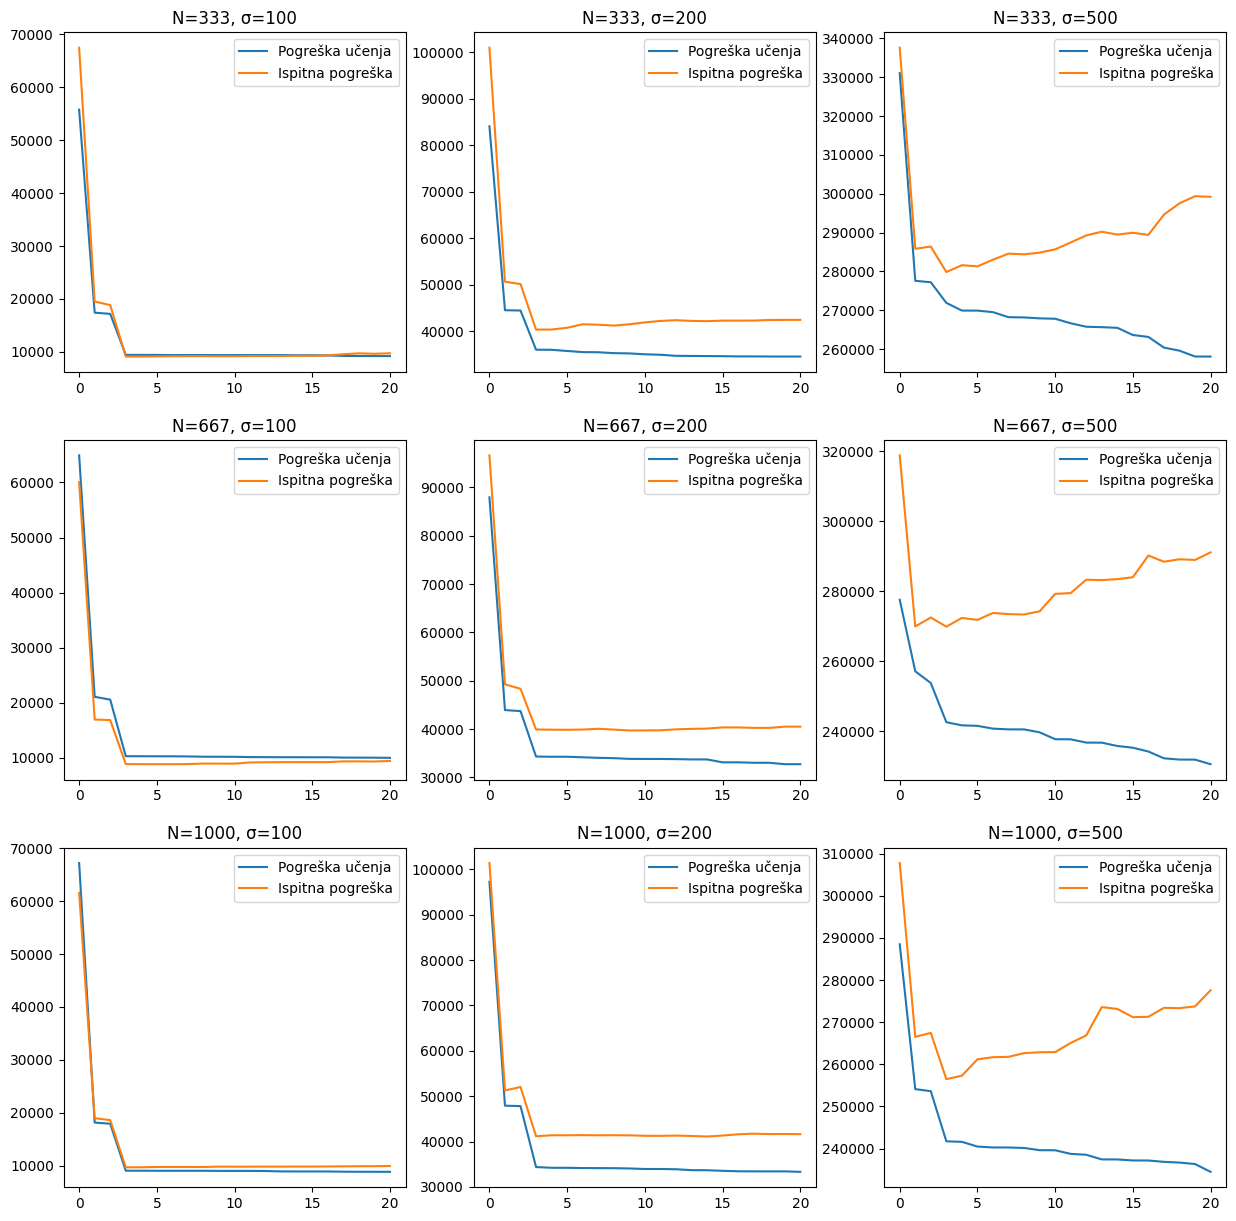

In [220]:
N3 = [int(0.333 * 1000), int(0.667 * 1000), 1000]
sigme3 = [100, 200, 500]
degrees = range(0, 21)

fig, axes = plt.subplots(len(N3), len(sigme3), figsize=(15, 15))

for i, N in enumerate(N3):
    for j, sigma in enumerate(sigme3):
        X = np.linspace(-5, 5, 1000).reshape(-1, 1)
        X_train, X_test = train_test_split(X, test_size=0.5)
        y_train = make_labels(X_train, f, sigma)
        y_test = make_labels(X_test, f, sigma)

        train_errors3 = []
        test_errors3 = []

        for degree in degrees:
            poly = PolynomialFeatures(degree=degree)
            phi_train = poly.fit_transform(X_train)
            phi_test = poly.transform(X_test)

            model = LinearRegression()
            model.fit(phi_train, y_train)

            h_train = model.predict(phi_train)
            h_test = model.predict(phi_test)

            train_e3 = mean_squared_error(y_train, h_train)
            test_e3 = mean_squared_error(y_test, h_test)

            train_errors3.append(train_e3)
            test_errors3.append(test_e3)

        ax = axes[i, j]
        ax.plot(degrees, train_errors3, label='Pogreška učenja')
        ax.plot(degrees, test_errors3, label='Ispitna pogreška')
        ax.set_title(f'N={N}, σ={sigma}')
        ax.legend()

plt.show()


***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [70]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
lambde = [0, 1, 10]
d = 3

phi = PolynomialFeatures(d).fit_transform(X)
w4a = [];

for l in lambde:
    w = np.dot(np.dot(np.linalg.inv(np.dot(phi.T, phi) + l * np.eye(4)), phi.T), y)
    w4a.append(w)

# Ispis rezultata
for i in range(0,3):
    print(w4a[i])

[ 4.         -5.91666667  3.375      -0.45833333]
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]
[0.43312265 0.11060671 0.13827839 0.03093411]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [83]:
from sklearn.linear_model import Ridge

for i in lambde:

    model = Ridge(alpha = i)
    model.fit(phi, y)

    w4a = [model.intercept_] + list(model.coef_[1:])

    print(w4a)

[4.000000000000034, -5.91666666666673, 3.3750000000000253, -0.4583333333333363]
[3.0569614512471652, -0.6907936507936514, -0.283174603174602, 0.1445804988662129]
[2.4944418431229725, -0.1589729487341473, -0.13423066536848305, 0.08156009919705869]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

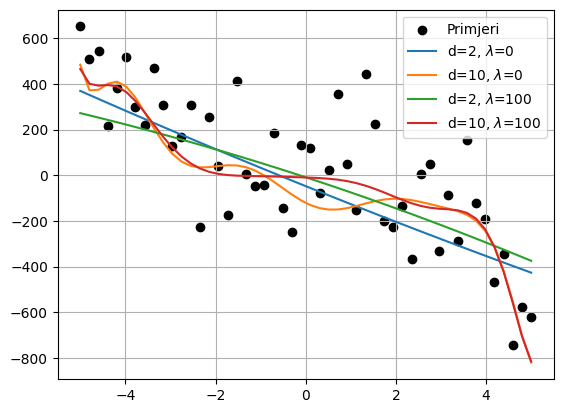

In [153]:
from types import LambdaType
sigma4c = 200
N4c = 50

X4c = np.concatenate(make_instances(-5, 5, N4c))
y4c = make_labels(X4c, f, sigma)
plt.scatter(X4c, y4c, color='black', label='Primjeri')

lambde4c = [0, 100]
d4c = [2, 10]

for l in lambde4c:
    for i in d4c:
        phi4c = PolynomialFeatures(i).fit_transform(X4c.reshape(-1,1))
        w4c = np.dot(np.dot(np.linalg.inv(np.dot(phi4c.T, phi4c) + np.dot(l, np.eye(i+1))), phi4c.T), y);
        h4c = np.dot(phi4c, w4c)

        plt.plot(X4c, h4c, label=f'd={i}, $\lambda$={l}')

plt.legend()
plt.grid()
plt.show()

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


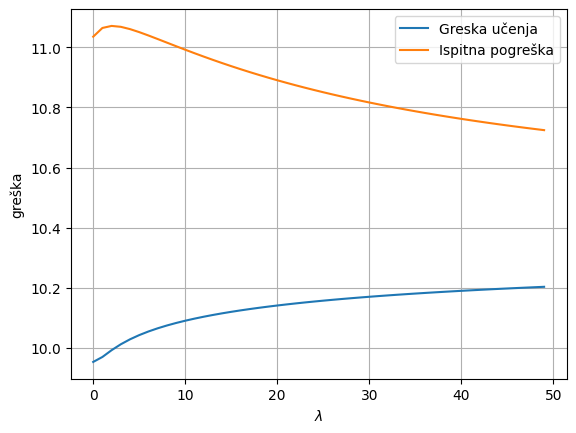

In [155]:
X4d_train, X4d_test, y4d_train, y4d_test = train_test_split(X4c, y4c, test_size = 0.5)
e4d_train = [];
e4d_test = [];
d = 10;
lambda4d = range(0, 50)

for i in lambda4d:
    phi4d_train = PolynomialFeatures(d).fit_transform(X4d_train.reshape(-1, 1))
    phi4d_test = PolynomialFeatures(d).fit_transform(X4d_test.reshape(-1, 1))
    w4d_train = np.dot(np.dot(np.linalg.inv(np.dot(phi4d_train.T, phi4d_train) + np.dot(i, np.eye(d+1))), phi4d_train.T), y4d_train);
    h4d_train = np.dot(phi4d_train, w4d_train)
    h4d_test = np.dot(phi4d_test, w4d_train)

    e4d_train.insert(i, np.log(mean_squared_error(y4d_train, h4d_train)))
    e4d_test.insert(i, np.log(mean_squared_error(y4d_test, h4d_test)))

plt.plot(lambda4d, e4d_train, lambda4d, e4d_test)
plt.grid()
plt.xlabel('$\lambda$')
plt.ylabel('greška')
plt.legend(['Greska učenja', 'Ispitna pogreška'], loc='best')

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [148]:
def nonzeroes(coef, tol=1e-6):
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

Text(0.5, 0, '$\\lambda$')

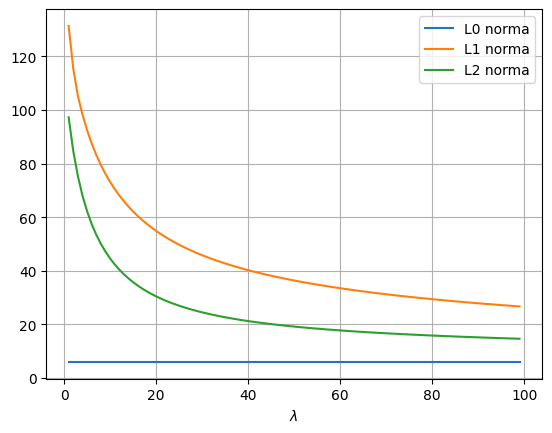

In [165]:
from sklearn.linear_model import Ridge
import math

lambda5a = range(1,100)
d5a = 5
X5a_train, X5a_test, y5a_train, y5a_test = train_test_split(X3b, y3b, test_size = 0.5)
phi5a_train = PolynomialFeatures(d5a).fit_transform(X5a_train.reshape(-1,1))

L0 = []
L1 = []
L2 = []

def L1_norm(w):
    return sum(abs(w))

def L2_norm(w):
    return math.sqrt(np.dot(w.T, w))

for i in lambda5a:
    w5a = np.dot(np.dot(np.linalg.inv(np.dot(phi5a_train.T, phi5a_train) + np.dot(i, np.eye(d5a+1))), phi5a_train.T), y5a_train)

    L0.append(nonzeroes(w5a))
    L1.append(L1_norm(w5a))
    L2.append(L2_norm(w5a))

plt.plot(lambda5a, L0, lambda5a, L1, lambda5a, L2)
plt.legend(['L0 norma', 'L1 norma', 'L2 norma']);
plt.grid()
plt.xlabel('$\lambda$')

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.360e+05, tolerance: 2.256e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.695e+04, tolerance: 2.256e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.455e+04, tolerance: 2.256e

Text(0.5, 0, '$\\lambda$')

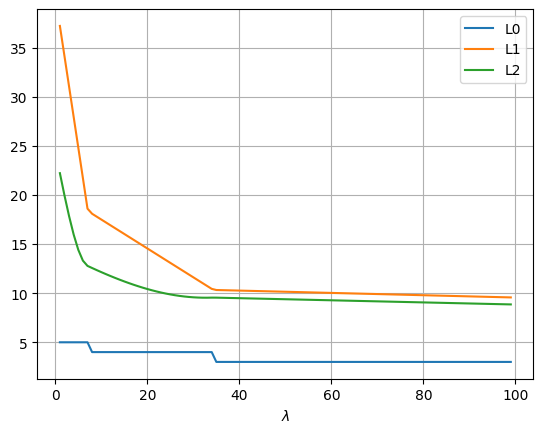

In [167]:
from sklearn.linear_model import Lasso

L0 = [];
L1 = [];
L2 = [];

for i in lambda5a:
    lasso = Lasso(alpha = i).fit(phi5a_train, y5a_train)
    w5b = lasso.coef_

    L0.append(nonzeroes(w5b))
    L1.append(L1_norm(w5b))
    L2.append(L2_norm(w5b))

plt.plot(lambda5a, L0, lambda5a, L1, lambda5a, L2)
plt.legend(['L0', 'L1', 'L2'], loc = 'best')
plt.grid()
plt.xlabel('$\lambda$')

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [168]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points)
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

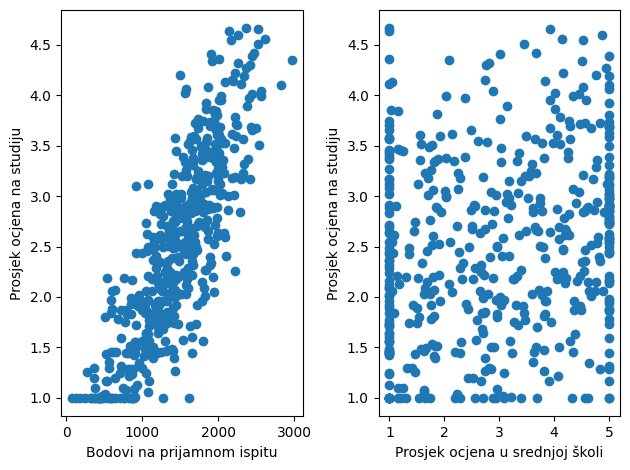

In [178]:
plt.subplot(1, 2, 1)
plt.scatter(grades_X[:, 0], grades_y)
plt.xlabel('Bodovi na prijamnom ispitu')
plt.ylabel('Prosjek ocjena na studiju')

plt.subplot(1, 2, 2)
plt.scatter(grades_X[:, 1], grades_y)
plt.xlabel('Prosjek ocjena u srednjoj školi')
plt.ylabel('Prosjek ocjena na studiju')

plt.tight_layout()
plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [286]:
model = Ridge(alpha = 0.01).fit(grades_X, grades_y)



Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [283]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()
grades_X_fixed = scaler_X.fit_transform(grades_X)
grades_y_fixed = scaler_y.fit_transform(grades_y.reshape(-1, 1))

ridge_model_fixed = Ridge(alpha=0.01)
ridge_model_fixed.fit(grades_X_fixed, grades_y_fixed)


Ridge(alpha=0.01)

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [276]:
colinear_feature = grades_X_fixed[:, -1]
grades_X_fixed_colinear = np.column_stack((grades_X_fixed, colinear_feature))

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.